Read the book sale data.

In [1]:
import pandas as pd

df = pd.read_csv('../../data/book_store_sales.csv')
df['Period'] = pd.to_datetime(df['Period'], format='%b-%y')
df

,Period,Value
0,1992-01-01,790
1,1992-02-01,539
2,1992-03-01,535
3,1992-04-01,523
4,1992-05-01,552
...,...,...
343,2020-08-01,729
344,2020-09-01,583
345,2020-10-01,425
346,2020-11-01,461


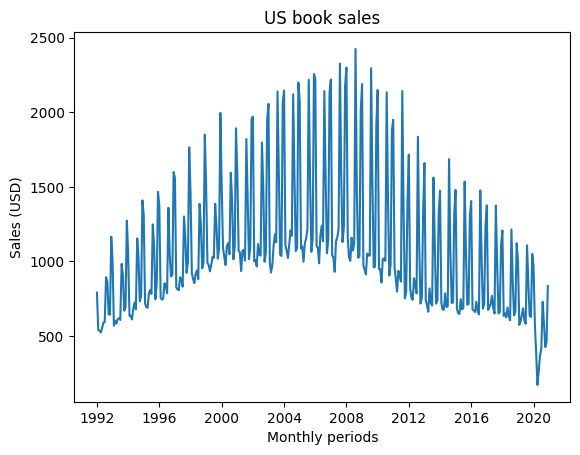

In [2]:
import matplotlib.pyplot as plt

plt.title("US book sales")
plt.ylabel("Sales (USD)")
plt.xlabel("Monthly periods")
plt.plot(df['Period'], df['Value'])

Split into training and testing sets.

We have 348 monthly observations dating back to January of 1992.

In [3]:
split_amount = 0.8
sales = df['Value']
split = int(split_amount * len(sales))
split

278

Our goal is to predict future sales using historical data, so we want to use the region before the split for training data. We will train the model with this and use this to see if it predicts the later observations that occurred in the future.

We first want to only use the sales data, so we first extract this.

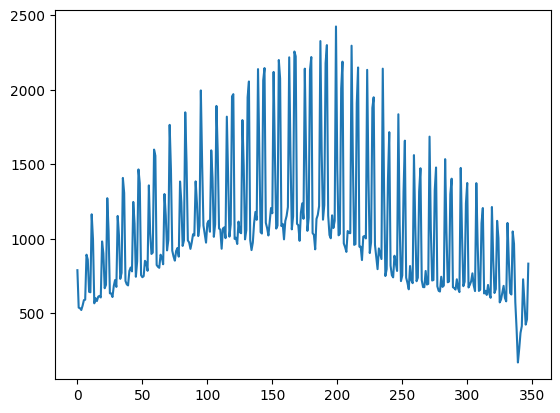

In [4]:
sales = df['Value'].to_numpy()

xs = [x for x in range(len(sales))]
plt.plot(xs, sales)

We see this mirrors the graph using the dates as independent variables.

In [5]:
train = sales[:split]
test = sales[split:]
len(train), len(test)

(278, 70)

Neural networks like standardized data. This helps prevent neurons from saturating.

In [18]:
import numpy as np
mean = np.mean(train)
std = np.std(train)

train_sales_std = (train - mean) / std
test_sales_std = (test - mean) / std

train_sales_std.shape, test_sales_std.shape

((278,), (70,))

# Create training data

In [58]:
total_months = len(train)
MIN_HISTORY = 12 # 12 months
num_examples = total_months - MIN_HISTORY

X_train = np.zeros((num_examples, total_months - 1, 1))
Y_train = np.zeros((num_examples, 1))

for i in range(num_examples):
  X_train[i, -(i+MIN_HISTORY):, 0] = train_sales_std[:i+MIN_HISTORY]
  print(f"Month {i+MIN_HISTORY}: Copy months [0, {i + MIN_HISTORY -1}] to  {-1 * (i + MIN_HISTORY)}:")
  Y_train[i, 0] = train_sales_std[i+MIN_HISTORY]



Month 12: Copy months [0, 11] to  -12:
Month 13: Copy months [0, 12] to  -13:
Month 14: Copy months [0, 13] to  -14:
Month 15: Copy months [0, 14] to  -15:
Month 16: Copy months [0, 15] to  -16:
Month 17: Copy months [0, 16] to  -17:
Month 18: Copy months [0, 17] to  -18:
Month 19: Copy months [0, 18] to  -19:
Month 20: Copy months [0, 19] to  -20:
Month 21: Copy months [0, 20] to  -21:
Month 22: Copy months [0, 21] to  -22:
Month 23: Copy months [0, 22] to  -23:
Month 24: Copy months [0, 23] to  -24:
Month 25: Copy months [0, 24] to  -25:
Month 26: Copy months [0, 25] to  -26:
Month 27: Copy months [0, 26] to  -27:
Month 28: Copy months [0, 27] to  -28:
Month 29: Copy months [0, 28] to  -29:
Month 30: Copy months [0, 29] to  -30:
Month 31: Copy months [0, 30] to  -31:
Month 32: Copy months [0, 31] to  -32:
Month 33: Copy months [0, 32] to  -33:
Month 34: Copy months [0, 33] to  -34:
Month 35: Copy months [0, 34] to  -35:
Month 36: Copy months [0, 35] to  -36:
Month 37: Copy months [0,